In [44]:
# !pip install pandas

In [45]:
import pandas as pd
import numpy as np

# Importar los datos
data = pd.read_csv("files/ViZieR_cum_glob.tsv", delimiter="|")

# Filtrar los datos sin distancia al sol
data = data.dropna(subset=['Rsun'])

data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48


In [46]:
# Chequear los tipos de datos
data.dtypes

_RAJ2000    float64
_DEJ2000    float64
ID           object
RAJ2000      object
DEJ2000      object
GLON        float64
GLAT        float64
Rsun         object
Rgc          object
Vt           object
[Fe/H]       object
SpT          object
c            object
Rh          float64
dtype: object

In [47]:
# Convertir Rsun en un valor numérico para poder calcular
data['Rsun'] = pd.to_numeric(data['Rsun'], errors='coerce')

In [60]:
# Calcular las coordenadas usando radianes
data['x'] = data['Rsun'] * np.cos(np.radians(data['_RAJ2000']*15)) * np.cos(np.radians(data['_DEJ2000']))
data['y'] = data['Rsun'] * np.sin(np.radians(data['_RAJ2000']*15)) * np.cos(np.radians(data['_DEJ2000']))
data['z'] = data['Rsun'] * np.sin(np.radians(data['_DEJ2000']))

In [49]:
data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh,x,y,z
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79,-0.007505,1.322981,-4.091414
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22,-6.889990,-2.234540,-3.625584
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81,-1.477307,-2.287397,-7.840624
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75,9.126260,0.152329,-13.141087
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48,0.298971,1.728610,9.540048


In [50]:
# Calcular la posición promedio del centro
x_avg = data['x'].mean()
y_avg = data['y'].mean()
z_avg = data['z'].mean()

In [51]:
x_avg, y_avg, z_avg

(-0.35661041839612173, 0.9352441318412935, -3.5349928267690482)

In [52]:
# Distancia al centro
center_distance = np.sqrt(x_avg**2 + y_avg**2 + z_avg**2)
center_distance

3.6739660942856913

In [53]:
# RA y DEC de una estrella en Sagitario.
# Por ejemplo Alnasl (Gamma Sagittarii)
# RA=18h, DEC=-30°
# https://en.wikipedia.org/wiki/Gamma2_Sagittarii
RA_star = 18 * 15  # Convertir a grados
DE_star = -30

RA_star_rad = np.deg2rad(RA_star)
DE_star_rad = np.deg2rad(DE_star)

x_star = center_distance * np.cos(RA_star_rad) * np.cos(DE_star_rad)
y_star = center_distance * np.sin(RA_star_rad) * np.cos(DE_star_rad)
z_star = center_distance * np.sin(DE_star_rad)

In [54]:
print(f"Posición de Alnasl (Gamma Sagittarii) en Sagitario: {x_star, y_star, z_star}")

Posición de Alnasl (Gamma Sagittarii) en Sagitario: (-5.844776201271391e-16, -3.181747970294103, -1.8369830471428454)


In [ ]:
"""
No parece estar muy cerca del centro de la galaxia.
Aunque la constelación de Sagitario apunta hacia la dirección del centro galáctico,
asumo que las estrellas individuales en la constelación pueden estar dispersas en una amplia área del cielo.
Alnasl es solo una de las estrellas en Sagitario y su posición puede estar más cerca o más lejos y
aparentar estar en el mismo centro desde nuestra perspectiva.
"""

In [61]:
# Radio del cúmulo en parsecs
# Suponiendo que Rh está en minutos de arco
data['radio_parsecs'] = data['Rsun'] * np.tan(np.deg2rad(data['Rh'] / 60))
radio_promedio = data['radio_parsecs'].mean()

In [57]:
data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh,x,y,z,radio_parsecs
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79,-0.007505,1.322981,-4.091414,0.003490
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22,-6.889990,-2.234540,-3.625584,0.005231
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81,-1.477307,-2.287397,-7.840624,0.001956
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75,9.126260,0.152329,-13.141087,0.003491
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48,0.298971,1.728610,9.540048,0.001354


In [58]:
# Los radios de los cúmulos me parecen no tan distintos.

In [59]:
print("RESUMEN")
print(f"Posición promedio del centro: {x_avg, y_avg, z_avg}")
print(f"Distancia del Sol al centro: {center_distance} kpc")
print(f"Posición de Alnasl (Gamma Sagittarii) en Sagitario: {x_star, y_star, z_star}")
print(f"Radio promedio de los cúmulos en parsecs: {radio_promedio}")

RESUMEN
Posición promedio del centro: (-0.35661041839612173, 0.9352441318412935, -3.5349928267690482)
Distancia del Sol al centro: 3.6739660942856913 kpc
Posición de Alnasl (Gamma Sagittarii) en Sagitario: (-5.844776201271391e-16, -3.181747970294103, -1.8369830471428454)
Radio promedio de los cúmulos en parsecs: 0.004434517864178316


In [ ]:
!pip install matplotlib

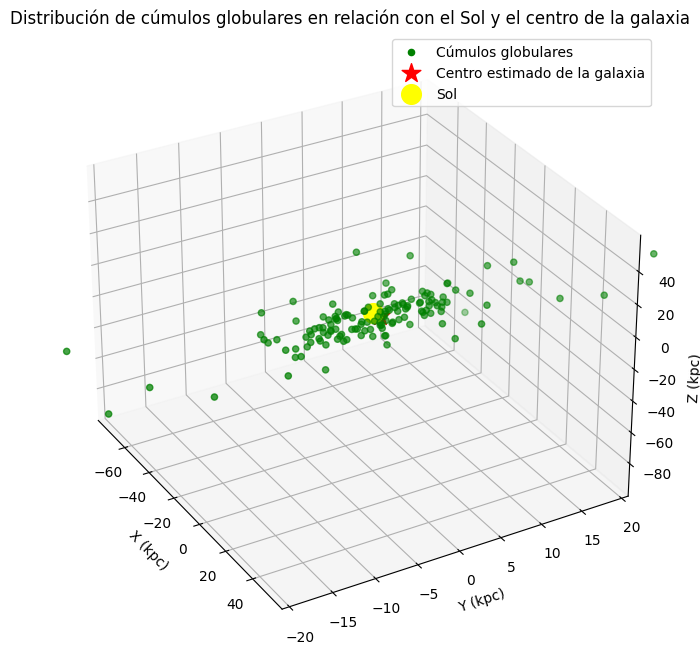

In [85]:
import matplotlib.pyplot as plt

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los cúmulos
ax.scatter(data['x'], data['y'], data['z'], c='green', marker='o', label='Cúmulos globulares')

# Marcar el punto estimado del centro de la galaxia
ax.scatter(x_avg, y_avg, z_avg, c='red', marker='*', s=200, label='Centro estimado de la galaxia')

# Marcar la posición del Sol
ax.scatter(0, 0, 0, c='yellow', marker='o', s=200, label='Sol')

# Etiquetas y título
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('Distribución de cúmulos globulares en relación con el Sol y el centro de la galaxia')
ax.legend()

# Adjust Y axis limits
y_min = -20  # Example value
y_max = 20   # Example value
ax.set_ylim(y_min, y_max)

# Adjust view
ax.view_init(elev=30, azim=-30)

# Mostrar el gráfico
plt.show()
